In [1]:
# encoding=utf-8
import numpy as np
from sklearn import svm
from sklearn import metrics
from scipy import sparse
import pandas as pd
from pandas import Series, DataFrame
from sklearn import neighbors
from sklearn import tree  
from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns
from Tca import TCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV as GSCV

from sklearn.svm import SVC

In [2]:
label_a = pd.read_csv("./data/label_all.csv")
label_a1 = label_a['SY']
label_a2 = label_a['TY']
S_Y_A = label_a1.values
T_Y_A = label_a2.values
label = pd.read_csv("./data/label_select.csv")
label1 = label['SY']
label2 = label['TY']
S_Y = label1.values
T_Y = label2.values
features_a = pd.read_csv("./data/feature_all.csv")
features_a = features_a.values
S_X_A = features_a[:,0:4]
T_X_A = features_a[:,4:8]
features = pd.read_csv("./data/feature_select.csv")
features = features.values
S_X = features[:,0:4]
T_X = features[:,4:8]
ss_X = StandardScaler()
S_X = ss_X.fit_transform(S_X)
T_X = ss_X.transform(T_X)
T_X_A = ss_X.transform(T_X_A)
S_X_A = ss_X.transform(S_X_A)

c:\users\shenchao\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\shenchao\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\shenchao\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\shenchao\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\she

In [3]:
S=np.concatenate((S_X,S_Y.reshape(-1,1)),axis=1)#样本和标签拼接
T=np.concatenate((T_X,T_Y.reshape(-1,1)),axis=1)
S_T=np.hstack((S,T))
tca=TCA()
X_src_tca, x_tar_tca, x_tar_o_tca=tca.fit_transform(S_X, T_X, T_X_A)

c:\users\10151\appdata\local\programs\python\python35\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [4]:
'''整理数据'''
df = DataFrame(S_T,columns=['s1','s2','s3','s4','ys','t1','t2','t3','t4','yt'])
train_sample=df[df['ys'] ==df['yt']]
train_sample=train_sample.values
X_train = train_sample[:,:4]
y_train = train_sample[:,4:5]
X_val = train_sample[:,5:9]
y_val = train_sample[:,9:10]

In [5]:
param_dic={
    'C':np.logspace(-2, 2, 5),
    'gamma':np.logspace(-2,2 , 5) 
}
C_s = np.logspace(-2, 2, 5)
gamma_s = np.logspace(-2,2 , 5) 
svc=SVC(gamma='scale')
gscv=GSCV(svc,param_dic)
gscv.fit(x_src_tca,S_Y)

c:\users\10151\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [6]:
best_tca_y_all=gscv.predict(x_tar_o_tca.real)

In [41]:
gscv.score(x_tar_o_tca.real,T_Y_A )

0.7958937198067633

In [7]:
results=gscv.cv_results_

In [8]:
results.keys()

dict_keys(['std_score_time', 'rank_test_score', 'mean_score_time', 'std_train_score', 'mean_fit_time', 'std_fit_time', 'split2_test_score', 'std_test_score', 'split0_train_score', 'mean_train_score', 'params', 'mean_test_score', 'split1_test_score', 'param_C', 'param_gamma', 'split2_train_score', 'split0_test_score', 'split1_train_score'])

In [37]:
results['rank_test_score']

array([ 8, 13, 22, 23, 23,  5,  9, 14, 21, 23,  1,  4, 12, 17, 20,  2,  6,
       11, 15, 18,  3,  7, 10, 15, 18])

In [16]:
C=results['param_C'].data

In [11]:
set(results['param_C'].data)

{0.01, 0.1, 1.0, 10.0, 100.0}

In [17]:
gamma=results['param_gamma'].data

In [25]:
results['split0_test_score']

array([0.9029029 , 0.8028028 , 0.27027027, 0.27027027, 0.27027027,
       0.91291291, 0.89389389, 0.78278278, 0.27427427, 0.27027027,
       0.91991992, 0.92092092, 0.87587588, 0.72972973, 0.32832833,
       0.91191191, 0.91191191, 0.87787788, 0.74474474, 0.35035035,
       0.91391391, 0.91091091, 0.87787788, 0.74474474, 0.35035035])

In [31]:
res_df=pd.DataFrame({
    'C':results['param_C'].data,
    'gamma':results['param_gamma'].data,
    'score':results['split0_test_score']
})
param_gamma_list=list(set(results['param_gamma'].data))
param_gamma_list.sort()
x_axis=np.log10(np.array((param_gamma_list)))

       C gamma     score
1   0.01   0.1  0.802803
6    0.1   0.1  0.893894
11     1   0.1  0.920921
16    10   0.1  0.911912
21   100   0.1  0.910911
       C gamma     score
2   0.01     1  0.270270
7    0.1     1  0.782783
12     1     1  0.875876
17    10     1  0.877878
22   100     1  0.877878
       C gamma     score
3   0.01    10  0.270270
8    0.1    10  0.274274
13     1    10  0.729730
18    10    10  0.744745
23   100    10  0.744745
       C gamma     score
0   0.01  0.01  0.902903
5    0.1  0.01  0.912913
10     1  0.01  0.919920
15    10  0.01  0.911912
20   100  0.01  0.913914
       C gamma     score
4   0.01   100  0.270270
9    0.1   100  0.270270
14     1   100  0.328328
19    10   100  0.350350
24   100   100  0.350350


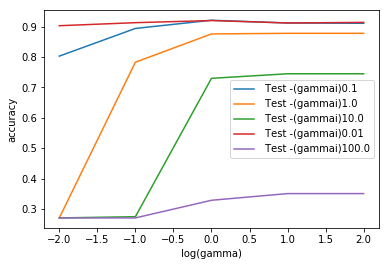

In [33]:
for gammai in set(results['param_gamma'].data):
    print(res_df[res_df['gamma']==gammai])
    plt.plot(x_axis,res_df[res_df['gamma']==gammai]['score'].values, label = ' Test -(gammai)' + str(gammai))
plt.legend()
plt.xlabel( 'log(gamma)' )                                                                                                      
plt.ylabel( 'accuracy' )
plt.savefig('RBF_SVM_Rent.png' )
plt.show()


In [34]:

def fit_grid_point_RBF(C, gamma, X_train, y_train, X_val, y_val):
    SVC3 =  SVC( C = C, kernel='rbf', gamma = gamma)
    SVC3 = SVC3.fit(X_train, y_train)
    y_pred1 = SVC3.predict(X_val)
    accuracy=metrics.accuracy_score(y_val, y_pred1)
    kappa=metrics.cohen_kappa_score(y_val, y_pred1)
    conf_matrix= metrics.confusion_matrix(y_val,y_pred1)
    score=accuracy
    return accuracy,kappa,conf_matrix

accuracy1 = []
accuracy2 = []
accuracy3 = []
kappa1 = []
kappa2 = []
kappa3 = []


In [35]:
  
for i, oneC in enumerate(C_s):
    for j, gamma in enumerate(gamma_s):
        tmp_acc,tmp_kappa,tmp_conf_matrix = fit_grid_point_RBF(oneC, gamma, x_src_tca, S_Y, x_tar_o_tca,T_Y_A)
        accuracy3.append(tmp_acc)
        kappa3.append(tmp_kappa)
        print (tmp_conf_matrix)
accuracy3 =np.array(accuracy3).reshape(len(C_s),len(gamma_s))
kappa3 =np.array(kappa3).reshape(len(C_s),len(gamma_s))
x_axis = np.log10(C_s)


ValueError: Complex data not supported
[[ 13.95412775+0.j  27.57323448+0.j  -3.53612695+0.j -18.13501931+0.j]
 [ 14.16062953+0.j  27.6728291 +0.j  -3.30579928+0.j -17.83906638+0.j]
 [ 15.00134614+0.j  27.79615353+0.j  -3.91972051+0.j -17.73305333+0.j]
 ...
 [ -2.86176175+0.j  13.99367065+0.j  -8.20633588+0.j -21.76121386+0.j]
 [ -9.53940574+0.j  18.94076373+0.j -10.12446284+0.j -21.01216078+0.j]
 [-16.15756782+0.j  21.65705939+0.j -11.12661423+0.j -17.56572609+0.j]]


In [ ]:
for j, gamma in enumerate(gamma_s):
    plt.plot(x_axis, np.array(accuracy3[:,j]), label = ' Test -(gamma)' + str(gamma))
plt.legend()
plt.xlabel( 'log(C)' )                                                                                                      
plt.ylabel( 'accuracy' )
plt.savefig('RBF_SVM_Rent.png' )
plt.show()


In [ ]:

for j, gamma in enumerate(gamma_s):
    plt.plot(x_axis, np.array(kappa3[:,j]), label = ' Test -(gamma)' + str(gamma))
plt.legend()
plt.xlabel( 'log(C)' )                                                                                                      
plt.ylabel( 'kappa' )
plt.savefig('RBF_SVM_Rent.png' )
plt.show()